In [132]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from sklearn.metrics import log_loss

In [133]:
import numpy as np
from pathlib import Path
from pandas import DataFrame, read_csv
from matplotlib import pyplot as plt

In [134]:
from google.colab import drive
drive.mount('/content/drive/')

In [135]:
def create_model(input_add=0):
    model = Sequential()
    input_shape_ = 16+input_add
    model.add(Dense(64, input_shape=(input_shape_,)))
    model.add(LeakyReLU())
    model.add(Dense(32, input_shape=(64,)))
    model.add(LeakyReLU())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    model_graph = tf.keras.utils.plot_model(model,show_shapes=True, show_layer_names=True)
    return model, model_graph

In [136]:
def read_data(data_type=None):
    data_string = ""
    data_add = 0
    if data_type:
        data_string = f"+{data_type}"
        data_add = 1

    folder_dir = '/content/drive/MyDrive/Colab Notebooks/data_classifier_DL'

    x_dataframe = read_csv(Path(folder_dir, f"new_train_scaled{data_string}.csv"))
    x_dataset = x_dataframe.values
    y_dataframe = read_csv(Path(folder_dir, f"new_train_label_scaled{data_string}.csv"))
    y_dataset = y_dataframe.values

    X = x_dataset[:, 0:17+data_add]
    Y = y_dataset[:, 0]

    return X, Y

In [137]:
def train_each(data_type=None):
    data_add = 0
    if data_type:
        data_add = 1

    X, Y = read_data(data_type)

    classifier, model_graph = create_model(data_add)

    train_history = classifier.fit(X, Y, 
                               epochs=30, 
                               batch_size=16,
                               validation_split=0.3, 
                               shuffle=True)
    
    print("-"*20)
    print(f'Log Loss Score: {log_loss(Y, classifier(X)):.6f}')

    plt.plot(train_history.history['accuracy'])
    plt.plot(train_history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.plot(train_history.history['loss'])
    plt.plot(train_history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    return classifier, model_graph, train_history

Epoch 1/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3732 - accuracy: 0.8804 - val_loss: 0.3934 - val_accuracy: 0.8690
Epoch 2/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3651 - accuracy: 0.8822 - val_loss: 0.4066 - val_accuracy: 0.8690
Epoch 3/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3636 - accuracy: 0.8822 - val_loss: 0.3877 - val_accuracy: 0.8690
Epoch 4/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3626 - accuracy: 0.8822 - val_loss: 0.3958 - val_accuracy: 0.8690
Epoch 5/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3619 - accuracy: 0.8822 - val_loss: 0.3889 - val_accuracy: 0.8690
Epoch 6/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3615 - accuracy: 0.8822 - val_loss: 0.3901 - val_accuracy: 0.8690
Epoch 7/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3609 - accuracy: 0.8822 - val_loss: 0.3955 - val_accuracy: 0.8690
Epoch 

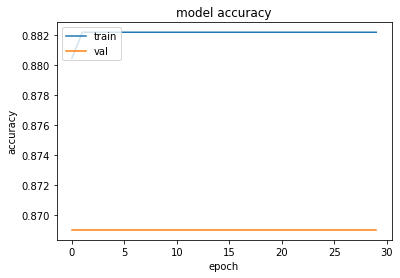

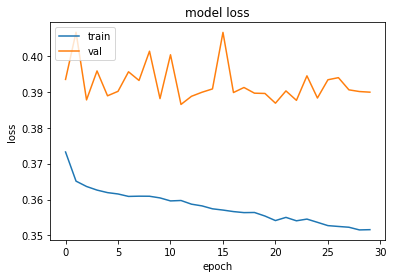

In [138]:
model_regular, model_reg_graph, model_reg_history = train_each()

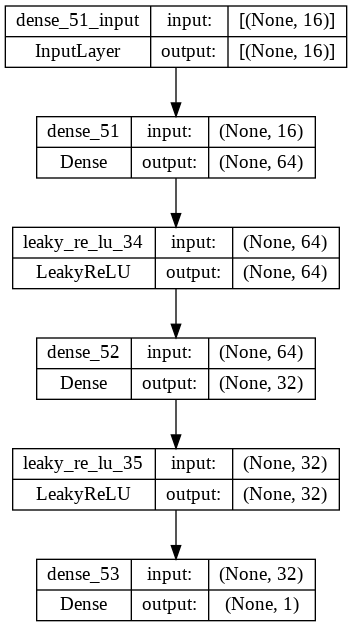

In [139]:
model_reg_graph

Epoch 1/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3713 - accuracy: 0.8816 - val_loss: 0.3983 - val_accuracy: 0.8690
Epoch 2/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3647 - accuracy: 0.8822 - val_loss: 0.4002 - val_accuracy: 0.8690
Epoch 3/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3637 - accuracy: 0.8822 - val_loss: 0.3873 - val_accuracy: 0.8690
Epoch 4/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3633 - accuracy: 0.8822 - val_loss: 0.3907 - val_accuracy: 0.8690
Epoch 5/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3636 - accuracy: 0.8822 - val_loss: 0.3880 - val_accuracy: 0.8690
Epoch 6/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3628 - accuracy: 0.8822 - val_loss: 0.3892 - val_accuracy: 0.8690
Epoch 7/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3616 - accuracy: 0.8822 - val_loss: 0.3903 - val_accuracy: 0.8690
Epoch 

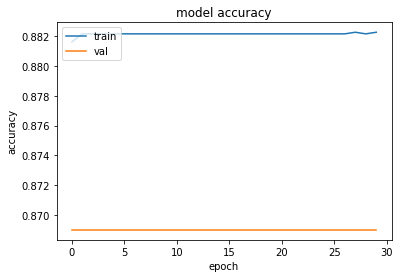

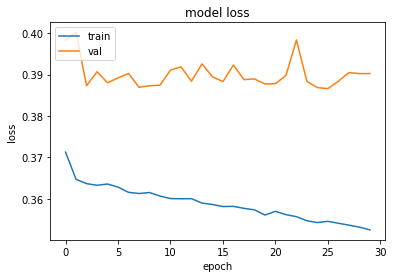

In [140]:
model_kmeans, model_kmeans_graph, model_kmeans_history = train_each("kmeans")

Epoch 1/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3729 - accuracy: 0.8810 - val_loss: 0.3897 - val_accuracy: 0.8690
Epoch 2/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3649 - accuracy: 0.8822 - val_loss: 0.3937 - val_accuracy: 0.8690
Epoch 3/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3641 - accuracy: 0.8822 - val_loss: 0.3904 - val_accuracy: 0.8690
Epoch 4/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3633 - accuracy: 0.8822 - val_loss: 0.3903 - val_accuracy: 0.8690
Epoch 5/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3631 - accuracy: 0.8822 - val_loss: 0.3898 - val_accuracy: 0.8690
Epoch 6/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3620 - accuracy: 0.8822 - val_loss: 0.3876 - val_accuracy: 0.8690
Epoch 7/30
579/579 [==============================] - 2s 3ms/step - loss: 0.3618 - accuracy: 0.8822 - val_loss: 0.3927 - val_accuracy: 0.8690
Epoch 

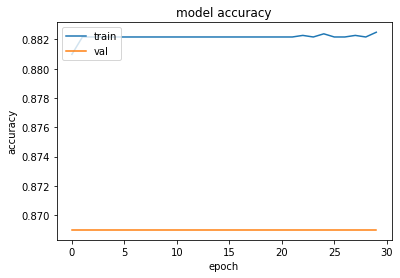

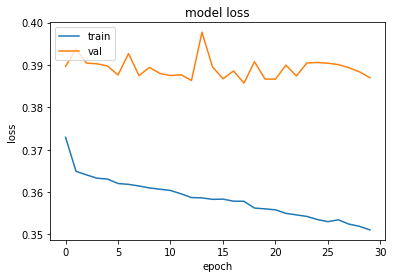

In [141]:
model_som, model_som_graph, model_som_history = train_each("som")

In [142]:
def write_values(model, data_type=None):
    data_string = ""
    data_add = 0
    if data_type:
        data_string = f"+{data_type}"
        data_add = 1

    folder_dir = '/content/drive/MyDrive/Colab Notebooks/data_classifier_DL'

    x_dataframe = read_csv(Path(folder_dir, f"new_test_scaled{data_string}.csv"))
    x_dataset = x_dataframe.values
    X = x_dataset[:, 0:17+data_add]


    y_dir = Path(folder_dir, f"new_test_label{data_string}.csv")

    Y = model(X)
    Y = Y.numpy().round()
    print(Y)

    DataFrame(Y).to_csv(y_dir, header=["credit"], index=False)
    return Y

In [143]:
Y = write_values(model_regular)
print("-"*40)
print("The proportion of prediction values of 1 is:")
print(f"{Y.sum()/len(Y)*100:.2f}%")

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
----------------------------------------
The proportion of prediction values of 1 is:
100.00%


In [144]:
Y = write_values(model_kmeans, "kmeans")
print("-"*40)
print("The proportion of prediction values of 1 is:")
print(f"{Y.sum()/len(Y)*100:.2f}%")

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
----------------------------------------
The proportion of prediction values of 1 is:
100.00%


In [145]:
Y = write_values(model_som, "som")
print("-"*40)
print("The proportion of prediction values of 1 is:")
print(f"{Y.sum()/len(Y)*100:.2f}%")

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
----------------------------------------
The proportion of prediction values of 1 is:
100.00%


In [146]:
train_x, train_y = read_data()

print(f"The proportion of the values of 1 to 0 from the training data is: {train_y.sum()/len(train_y)*100:.2f}%")

The proportion of the values of 1 to 0 from the training data is: 87.82%
